<a href="https://colab.research.google.com/github/Jolanta27/Unsupervised_learning/blob/master/Time_to_Practice__Unsupervised_Learning_Clustering_with_partial_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="180px" src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" align="left" hspace="30px" vspace="50px"/>

# Welcome to your next notebook with SDA!

During the classes we will mostly use [Google Colaboratory](https://colab.research.google.com/?hl=en) which is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

However, for bigger projects, especially involving Deep Learning and/or big data reading, it might be a better choice to setup Jupyter Notebook or Jupyter Lab on your computer. Also, it is worth noticing that there is a great number of useful extensions (see [nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html) and [jupyter-labextension](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)) not available for Colab users.

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# Machine Learning: Unsupervised Learning
## Clustering Algorithms

<br>

Upon completion of the **<font color='#ed7d31'>Machine Learning: Unsupervised Learning</font>** course, you will gain familiarity with common applications of the Unsupervised Learning approach, such as clustering and dimensionality reduction. These techniques are essential for uncovering valuable insights directly from the data and can also serve as a foundation for subsequent Supervised Learning problems.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

random = np.random.RandomState(0)

!git clone https://github.com/matzim95/ML-datasets

%matplotlib inline

Cloning into 'ML-datasets'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 201 (delta 35), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (201/201), 35.87 MiB | 5.38 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Updating files: 100% (130/130), done.


<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 1. Introduction to unsupervised learning problems

**<font color='#ed7d31'>PRACTICAL WORKSHOPS WITH SCREEN SHARING BY YOUR MENTOR</font>**

<img src="https://drive.google.com/uc?export=view&id=1kZPnIaGksqNRAwxfqz-Hh-82prK2RxdL" alt="Machine Learning problems" title="Machine Learning problems" align="center" width="1000px" hspace="0px" vspace="10px"/>

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 2. Data clustering

Data clustering is the process of grouping similar data points together to uncover patterns and structures within a dataset. Clustering has various applications and helps in understanding data, making informed decisions, and supporting further analysis.

<img src="https://drive.google.com/uc?export=view&id=121btZg3BOoE6ew6wE5WSy_G-zDvCL5Oy" alt="Data clustering" title="Data clustering" align="center" width="800px" hspace="0px" vspace="10px"/>

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Clustering evaluation metrics

As in classification and regression problems, there are several evaluation metrics commonly used to **<font color='#ed7d31'>assess the quality and performance of clustering algorithms</font>**.

Here are some of the widely used evaluation metrics in clustering:
* internal measures (both intra-cluster & inter-cluster similarities)
    * Sum of Squared Errors (SSE)
    * Silhouette Coefficient
    * Davies-Bouldin Index (DBI)
* external measures
    * Purity
    * Rand Index

See the official [sklearn documentation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

### Intra-cluster sum of distances (SSE)

Let's assume our data will be two-dimensional.

As input, we will receive a list of clusters along with the points that belong to them, i.e.:
* input: `clusters = [cluster1, cluster2, cluster3, ...]`
* where `clusterX - [[x1, x2, x3, ...], [y1, y2, y3, ...]]`

and let's implement SSE on our own.

In [ ]:
def sse(clusters):
    result = 0
    for xs, ys in clusters:
        distance = calculate_distance(xs, ys)
        result += distance / len(xs)
    return result

def calculate_distance(xs, ys):
    result = 0
    for x1, y1 in zip(xs, ys):
        for x2, y2 in zip(xs, ys):
            result += np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return result

In [ ]:
cluster1 = [np.random.randint(0, 10, 10), np.random.randint(0, 10, 10)]
cluster2 = [np.random.randint(20, 30, 10), np.random.randint(0, 10, 10)]
cluster3 = [np.random.randint(0, 10, 10), np.random.randint(10, 20, 10)]

In [ ]:
sse([cluster1]), sse([cluster2]), sse([cluster3])

(54.15199676366533, 41.46909502689293, 41.50600755766064)

In [ ]:
sse([cluster1, cluster2, cluster3])

137.1270993482189

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Create a scatterplot with `clusters` and color them accordingly.

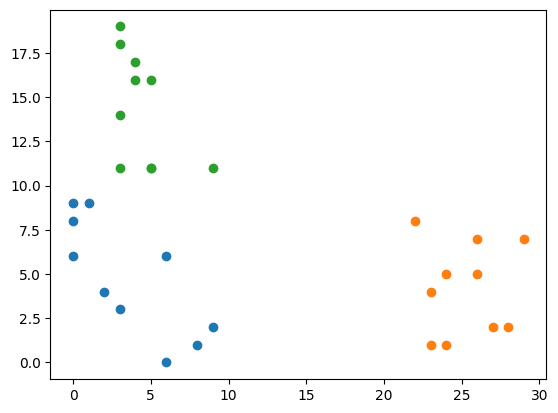

In [ ]:
plt.scatter(cluster1[0], cluster1[1])
plt.scatter(cluster2[0], cluster2[1])
plt.scatter(cluster3[0], cluster3[1])

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Change the range of points so that the clusters overlap more or less and see how it affects the SSE.

In [ ]:
cluster1 = [np.random.randint(10, 20, 10), np.random.randint(0, 10, 10)]
cluster2 = [np.random.randint(10, 20, 10), np.random.randint(0, 15, 10)]
cluster3 = [np.random.randint(10, 25, 10), np.random.randint(0, 10, 10)]

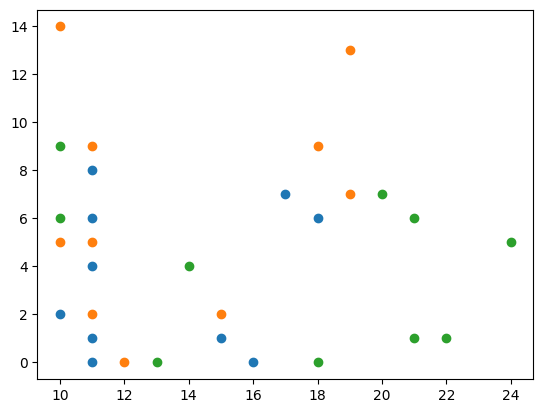

In [ ]:
plt.scatter(cluster1[0], cluster1[1])
plt.scatter(cluster2[0], cluster2[1])
plt.scatter(cluster3[0], cluster3[1])

In [ ]:
#punkty na siebie nie zachodza


In [ ]:
cluster1 = [np.random.randint(0, 5, 10), np.random.randint(0, 5, 10)]
cluster2 = [np.random.randint(45, 50, 10), np.random.randint(5, 15, 10)]
cluster3 = [np.random.randint(0, 10, 10), np.random.randint(35, 40, 10)]

In [ ]:
sse([cluster1, cluster2, cluster3])

106.01741943950844

### Silhouette Coefficient

Let's use the previously defined `clusters`.

In [ ]:
def dist_to_cluster(point, cluster):
    x_i, y_i = point
    xs, ys = cluster
    distances = 0
    for x_j, y_j in zip(xs, ys):
        distances += np.sqrt((x_j - x_i)**2 + (y_j - y_i)**2)
    return distances

def a(point, cluster):
    distances = dist_to_cluster(point, cluster)
    n_points = len(cluster[0])
    return distances / (n_points - 1)

def b(point, other_clusters):
    x_i, y_i = point
    results = []
    for cluster in other_clusters:
        results.append(dist_to_cluster(point, cluster) / len(cluster[0]))
    return min(results)

def silhouette(point, cluster, other_clusters):
    if len(cluster) == 1:
        return 0
    else:
        ar = a(point, cluster)
        br = b(point, other_clusters)
        return (br - ar) / max(ar, br)

def global_silhouette(clusters):
    if len(clusters) == 1:
        return 0
    results = []
    for key, cluster in clusters.items():
        other_clusters = [c for k, c in clusters.items() if k != key]
        for point in zip(*cluster):
            s = silhouette(point, cluster, other_clusters)
            results.append(s)
    return np.mean(results)

In [ ]:
clusters = {1: cluster1, 2: cluster2, 3: cluster3}

global_silhouette(clusters)

-0.044214544717611

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Import `silhouette_score()` function from sklearn to compare results with our implementation of the metric. Note that first you will have to change the format of input data and create labels for each observation. The following functions might be useful:
```python
from sklearn.metrics import silhouette_score

np.stack(..., axis=1)
np.concatenate([...], axis=0)

silhouette_score(clusters_.T, labels)

assert silhouette_score(clusters_.T, labels) == global_silhouette(clusters)
```

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
cluster1

[array([3, 0, 3, 2, 0, 1, 4, 2, 0, 0]), array([4, 4, 0, 4, 2, 2, 0, 0, 0, 3])]

In [ ]:
np.array(cluster1).T

array([[3, 4],
       [0, 4],
       [3, 0],
       [2, 4],
       [0, 2],
       [1, 2],
       [4, 0],
       [2, 0],
       [0, 0],
       [0, 3]])

In [ ]:
clusters = np.array([np.array(cluster1).T, np.array(cluster2).T, np.array(cluster3).T])
labels = np.array([[0]*10, [1]*10, [2]* 10])

In [ ]:
clusters = clusters.reshape(30,2)
labels = labels.reshape(-1,1)
silhouette_score(clusters, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8975778770203723

See the possible solution at the end of the .ipynb file.

### Davies-Bouldin Index (DBI)

Let's use the previously defined `clusters` once more. This we will start with already defined function from the `sklearn` package.

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
# you need to complete the previous task first
# clusters_ = ???
# labels = ???
# davies_bouldin_score(clusters_, labels)

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Implement you own version of `davies_bouldin_index()` function and comapare results with `davies_bouldin_score()` from sklearn.

In [ ]:
def davies_bouldin_index(clusters, labels):
    pass

### Issue with internal measures

Internal measures for clustering, such as the SSE, Silhouette Coefficient, and Davies-Bouldin Index, evaluate the quality of clustering based solely on the data and cluster assignments. While these measures provide insights into the clustering performance, they have limitations that can affect their effectiveness, among others:
* lack of ground truth
* assumption of cluster shapes

Let's see how internal measures can poorly assess really effective clustering.

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples = 500
X, y = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05
)

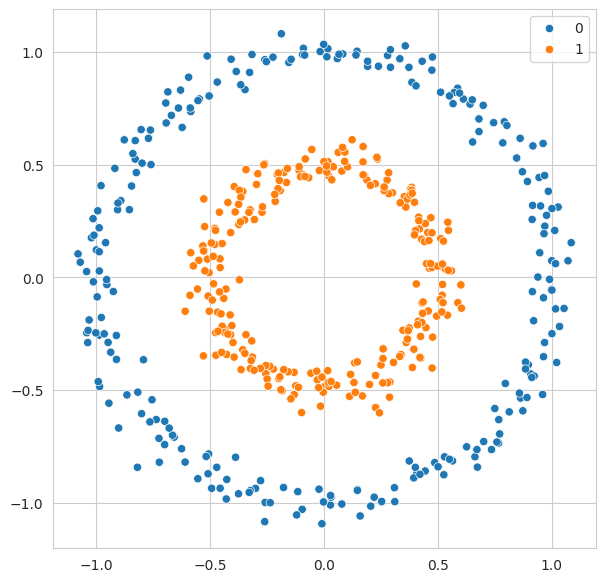

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(7, 7))

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
    plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, y)  # values from -1 to 1, close to 0 indicates poor performance

0.11273589480554634

In [ ]:
davies_bouldin_score(X, y)  # the lower value the better clustering is

712.6750654229277

### Purity



In [ ]:
# source: https://stackoverflow.com/questions/34047540/python-clustering-purity-metric
from sklearn.metrics.cluster import contingency_matrix

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix_ = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix_, axis=0)) / np.sum(contingency_matrix_)

In [ ]:
purity_score(y, y)

1.0

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Number of clusters

Let's implement it together!

Initialize the test environment:
* Create a random distribution with 3 different groups
* Visualize the created data
* Perform naive/dummy clustering
* Create visualization of the clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rnd = np.random.RandomState(25)

x1 = sorted(list(rnd.normal(1.0, 0.5, size=100)))
y1 = list(rnd.normal(2.0, 0.4, size=100))

x2 = sorted(list(rnd.normal(2.0, 0.3, size=100)))
y2 = list(rnd.normal(4.0, 0.4, size=100))

x3 = sorted(list(rnd.normal(2.5, 0.4, size=100)))
y3 = list(rnd.normal(2.0, 0.5, size=100))

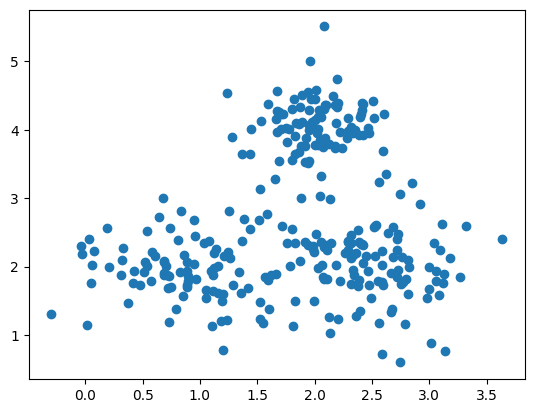

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    x1+x2+x3,
    y1+y2+y3
)
plt.show()

In [ ]:
models = []

# one large cluster containing all observations
model1 = [(x1+x2+x3, y1+y2+y3)]

# 2 clusters:
model2 = [(x1+x3, y1+y3), (x2,y2)]

# 3 clusters:
model3 = [(x1,y1), (x2,y2), (x3,y3)]

# 4 clusters:
model4 = [
    (x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]),
    (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
    (x2, y2),
    (x3, y3)
]

# 5 clusters:
model5 = [
    (x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]),
    (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
    (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]),
    (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
    (x3, y3)
]

# 6 clusters:
model6 = [
    (x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]),
    (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
    (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]),
    (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
    (x3[:int(len(x3)/2)], y3[:int(len(y3)/2)]),
    (x3[int(len(x3)/2):], y3[int(len(y3)/2):])
]

models = [model1, model2, model3, model4, model5, model6]

In [ ]:
def show_clusters(clusters):
    fig, ax = plt.subplots()
    for x, y in clusters:
        ax.scatter(x, y)
        sse_score = round(sse(clusters))
        plt.title(f"Model with {len(clusters)} cluster(s): SSE score {sse_score}")
    plt.show()

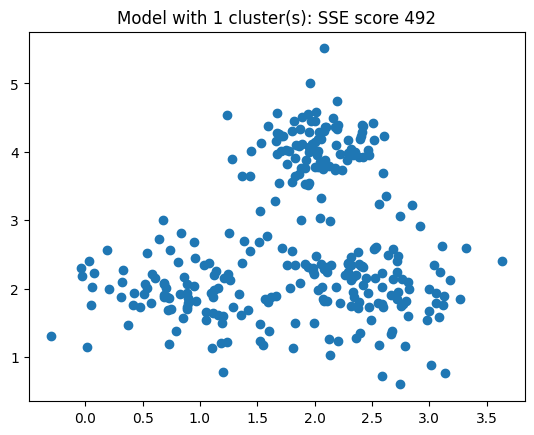

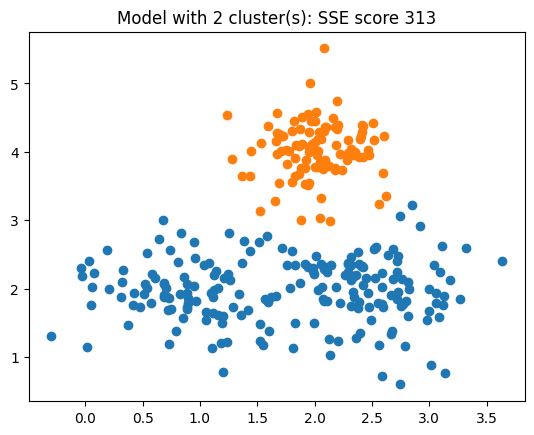

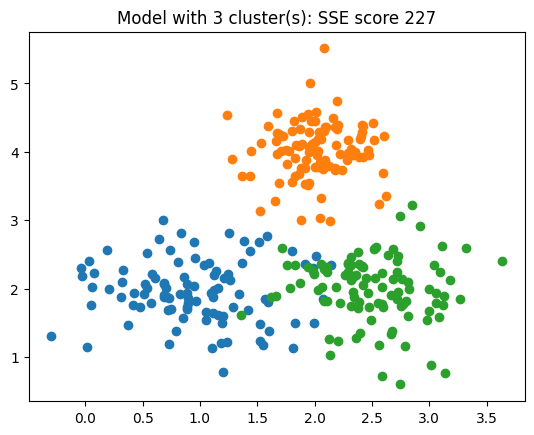

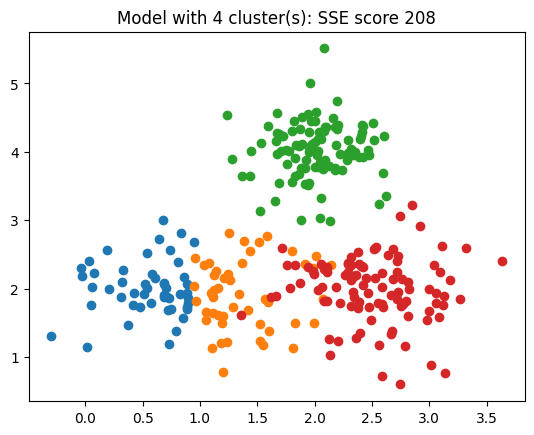

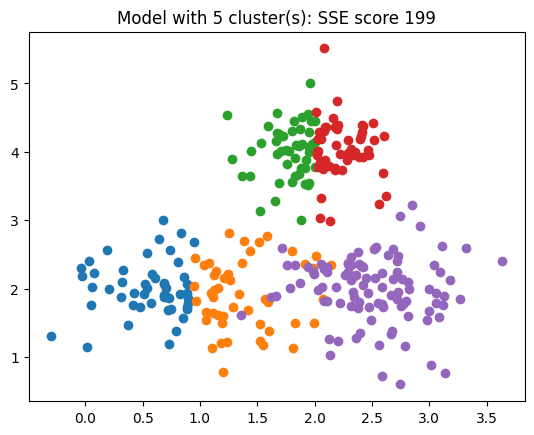

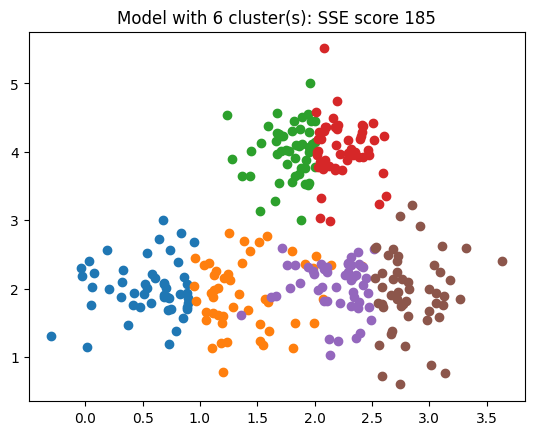

In [ ]:
for model in models:
    show_clusters(model)

Note that as the number of clusters increases, the value of SSE decreases all the time, despite the fact that it would seem at first glance that it is the 3 clusters that should be identified... So let's check on one graph how these SSE values change for different numbers of clusters.

In [ ]:
sse_scores = []
for model in models:
    sse_scores.append(sse(model))

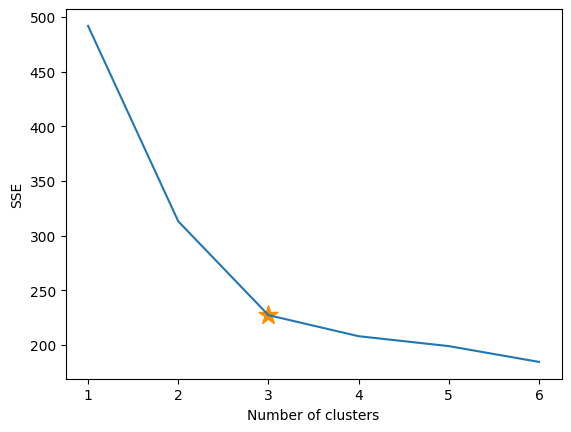

In [ ]:
n_clusters = list(range(1, len(sse_scores)+1))
plt.plot(
    n_clusters,
    sse_scores
)
plt.scatter(3, sse_scores[3 - 1], marker='*', s=200, c='darkorange')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Silhouette graphs

Of course, nothing prevents us from also looking at the aggregated Silhouette values for a selected predefined number of clusters.

In this case, we will look for the maximum value.

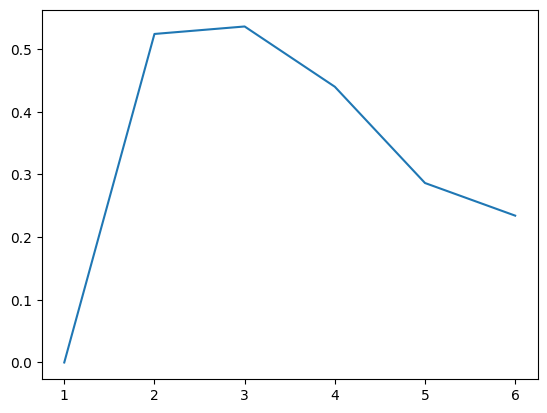

In [ ]:
sil = []
for model in models:
    to_dict = {}
    for index, cluster in enumerate(model):
        to_dict[index] = cluster

    returned = global_silhouette(to_dict)
    sil.append(returned)

plt.plot(list(range(1, len(sil) + 1)), sil)
plt.show()

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Use the code from the following page [plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) and adjust it to get the right Silhouette graphs for each of the models introduced earlier.

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 3. Clustering algorithms

So far we have tested the effectiveness of models created artificially for our needs, now let's finally try to use algorithms to solve the given clustering problem by their own.

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## K-means

K-means is a popular algorithm used for partitioning data into distinct groups, called clusters, based on their similarities. It aims to minimize the within-cluster (and maximize the inter-cluster) variance by iteratively assigning data points to clusters and updating the cluster centroids (means). K-means is an iterative and efficient algorithm that can handle large datasets.

### An example

Let's get a small collection of points:

In [1]:
!git clone https://github.com/matzim95/ML-datasets

%matplotlib inline
import pandas as pd

points = pd.read_csv('ML-datasets/points.csv', header=None)
points.head()

Cloning into 'ML-datasets'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 201 (delta 35), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (201/201), 35.87 MiB | 6.56 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Updating files: 100% (130/130), done.


,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613


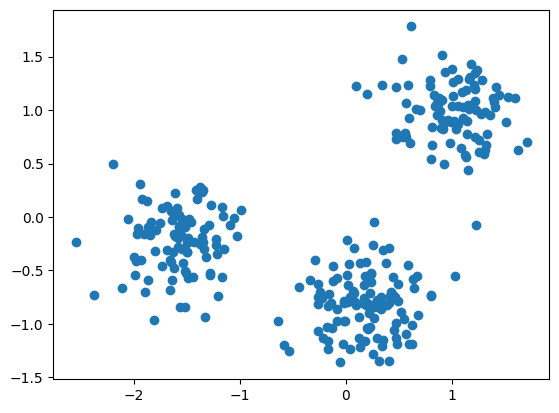

In [5]:
import matplotlib.pyplot as plt

xs = points.loc[:, 0]
ys = points.loc[:, 1]

fig, ax = plt.subplots()

ax.scatter(xs, ys)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


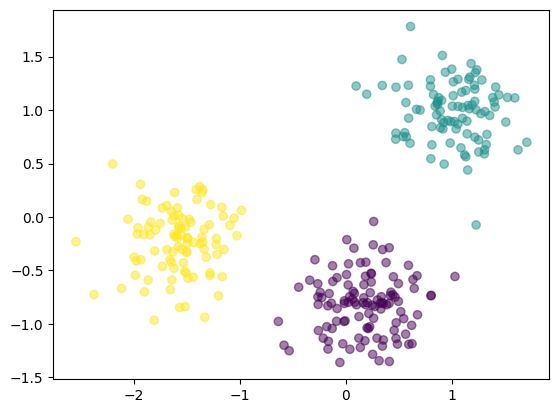

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(points)

labels = model.predict(points)

plt.scatter(xs, ys, c=labels, alpha=.5)
plt.show()

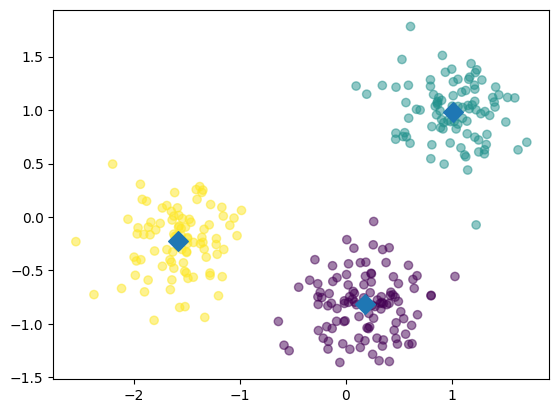

In [7]:
centroids = model.cluster_centers_

plt.scatter(xs, ys, c=labels, alpha=.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=100)
plt.show()

### Finding the optimal number of clusters with K-means

The most important thing for us is to make the aggregated distances of points from the centers of their cluster as small as possible (clusters are consolidated). This is what the built-in measure of `inertia` is used for. It shows us the sum of the distances of all points from their centroids. As you can see, the measure is already quite small for 3 clusters. Of course, it still decreases, but we don't want too many clusters. It is necessary to find a suitable compromise (trade-off) here.

In [8]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(points)
    inertias.append(model.inertia_)

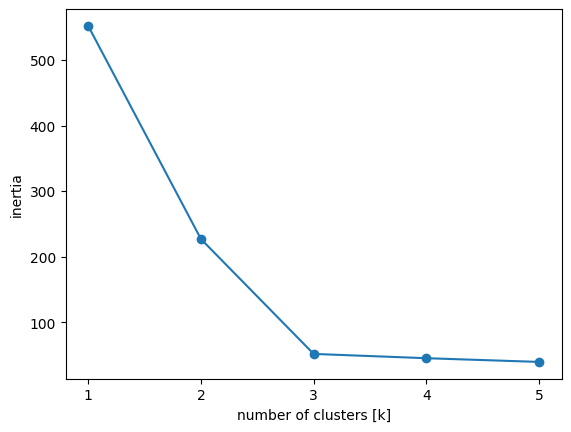

In [9]:
fig, ax = plt.subplots()

ax.plot(ks, inertias, '-o')
ax.set_xlabel('number of clusters [k]')
ax.set_ylabel('inertia')
ax.set_xticks(ks)
plt.show()

### Now let's try for the labeled data

Let's compare the model results with the ground truth values.

In [10]:
def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

In [11]:
wine, wine_classes = load_dataset('wine', 'Class')

In [12]:
y = wine.pop('class')
X = wine

X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
model = KMeans(n_clusters=3, n_init='auto')
labels = model.fit_predict(X)

df = pd.DataFrame({'y_pred': labels, 'ground_truth': y})
ct = pd.crosstab(df['y_pred'], df['ground_truth'])

ct

ground_truth,0,1,2
y_pred,,,
0,31,11,7
1,1,37,64
2,27,0,0


In [14]:
X.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

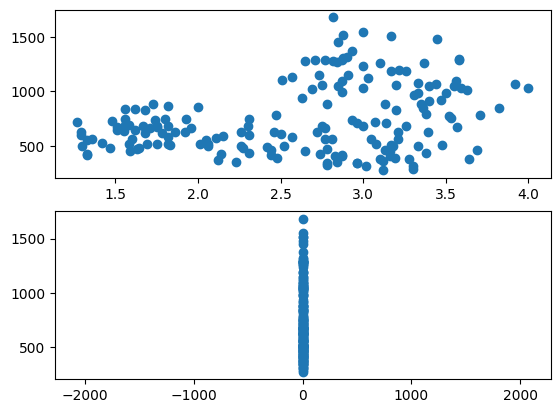

In [15]:
fig, axs = plt.subplots(2, 1)

axs[0].scatter(X['OD280/OD315 of diluted wines'], X['Proline'])
axs[1].axis('equal')
axs[1].scatter(X['OD280/OD315 of diluted wines'], X['Proline'])
plt.show()

In [16]:
for column in X:
    print(X[column].var())

0.6590623278105759
1.2480154034152224
0.07526463530756046
11.152686155018092
203.98933536469244
0.39168953532660455
0.997718672633784
0.015488633911001078
0.32759466768234624
5.374449383491404
0.052244960705897285
0.5040864089379801
99166.71735542436


The results are, to put it mildly, poor. This is due to the fact that the individual attributes in the wine set have very different variances (attribute distributions). This is a real obstacle to good clustering.

### Variables scaling

Let's use the function introduced earlier and used by us many times as part of the preprocessing steps in supervised learning algorithms. The results will be much better immediately because K-means requires standardization or normalization.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

labels = model.fit_predict(X_scaled)

df = pd.DataFrame({'y_pred': labels, 'ground_truth': y})
pd.crosstab(df['y_pred'], df['ground_truth'])

ground_truth,0,1,2
y_pred,,,
0,59,0,3
1,0,48,3
2,0,0,65


It is also possible to create a pipeline containing all the required steps, i.e. in which preprocessing and grouping occur automatically one after the other:

In [19]:
from sklearn.pipeline import make_pipeline

In [20]:
pipeline = make_pipeline(scaler, model)
y_pred = pipeline.fit_predict(X)

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm used to group together data points that are closely packed in high-density regions.

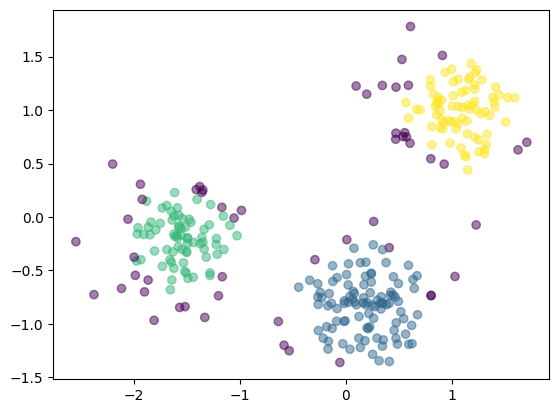

In [21]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.2, min_samples=10)
labels = model.fit_predict(points)

plt.scatter(xs, ys, c=labels, alpha=.5)
plt.show()

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Agglomerative Hierarchical Clustering

Agglomerative hierarchical clustering is yet another example of clustering algorithm that builds clusters by progressively merging the most similar ones (a bottom-up approach). It starts with each data point as a separate cluster and combines them based on their similarity. This process continues until all data points are in a single cluster or a desired number of clusters is reached.

### Example

For AHC, we will use the Eurovision 2016 collection, where countries are used as rows and the number of points awarded to each song as columns. Let's read this from the collection.

In [22]:
eurovision = pd.read_csv('ML-datasets/eurovision-2016.csv')
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [23]:
eurovision = eurovision.pivot(index='From country', columns='To country')['Jury Rank']
eurovision = eurovision.fillna(0)
eurovision.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,15.0,1.0,16.0,13.0,25.0,7.0,21.0,23.0,22.0,2.0,...,20.0,9.0,14.0,4.0,19.0,5.0,11.0,24.0,12.0,6.0
Armenia,0.0,6.0,22.0,25.0,7.0,4.0,15.0,5.0,10.0,1.0,...,14.0,3.0,23.0,9.0,12.0,8.0,17.0,11.0,16.0,19.0
Australia,13.0,0.0,24.0,12.0,1.0,3.0,10.0,20.0,16.0,5.0,...,4.0,21.0,22.0,18.0,11.0,6.0,23.0,8.0,9.0,7.0
Austria,9.0,1.0,0.0,12.0,6.0,14.0,5.0,24.0,7.0,4.0,...,10.0,2.0,25.0,8.0,22.0,15.0,3.0,11.0,16.0,18.0
Azerbaijan,25.0,4.0,15.0,0.0,22.0,3.0,11.0,19.0,16.0,12.0,...,6.0,5.0,9.0,1.0,18.0,10.0,20.0,13.0,2.0,14.0


In the scikit library, the linkage method is responsible for hierarchical clustering, while the dendrogram method allows you to visualize the result of its work. Linkage "complete" means that the distance between clusters will be measured as the distance between the most distant samples in both clusters.

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

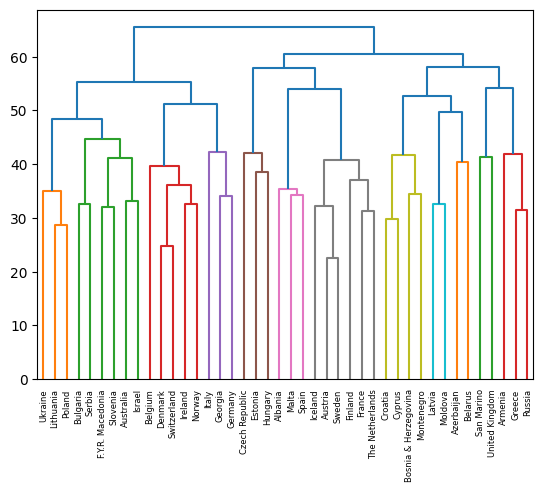

In [25]:
mergings = linkage(eurovision, method='complete')

dendrogram(
    mergings,
    labels=eurovision.index,
    leaf_rotation=90, leaf_font_size=6
)
plt.show()

The height of the dendrogram allows us to determine how close the points are to each other (the lower the merge, the closer the elements are to each other).

You can choose a different method of merging, such as `"single"`, in which case the distance between clusters is measured by the distance of the closest points of two clusters to each other.

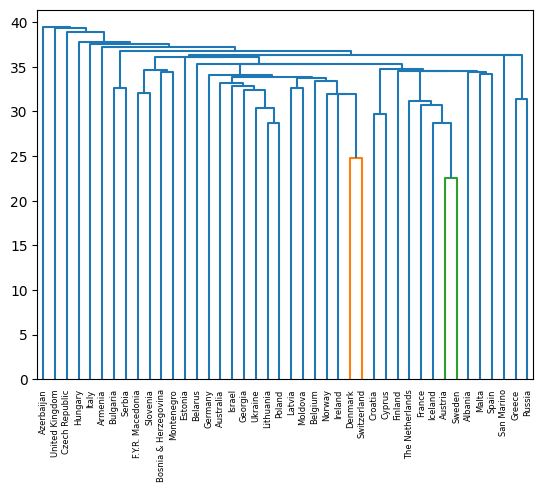

In [26]:
mergings = linkage(eurovision, method='single')

dendrogram(
    mergings,
    labels=eurovision.index,
    leaf_rotation=90, leaf_font_size=6
)
plt.show()

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Here we can also try to use sample normalization before applying the model itself. Try it yourself and check how does it influence the model performance.

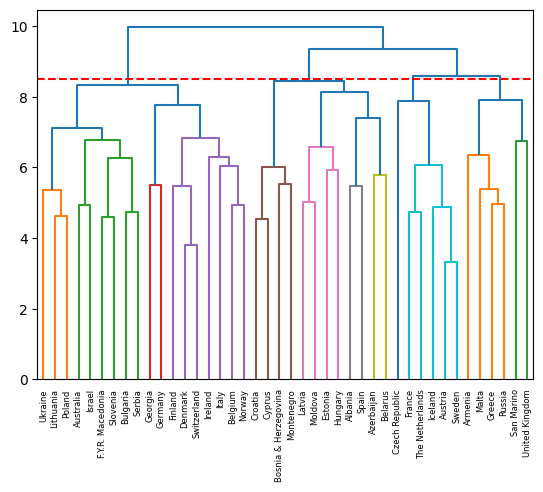

In [29]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sscaler = StandardScaler()
eurovision_scaled = scaler.fit_transform(eurovision)
mergings_scaled = linkage(eurovision_scaled, method='complete')

dendrogram(
    mergings_scaled,
    labels=eurovision.index,
    leaf_rotation=90, leaf_font_size=6
)
plt.axhline(8.5, c='r', linestyle='--')
plt.show()

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>
<br>

# TASKS

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1</font>**

Create custom random data from different normal distributions, i.e. with varying means, standard deviations and/or sizes. In addition, increase the number of target clusters from three to a higher number. Then visualize the data using a scatter plot with matplotlib or seaborn.

Hint: We used the following code during the class:
```python
import​ numpy ​as​ np
import​ matplotlib.pyplot ​as​ plt

rnd = np.random.RandomState(​25​)
x1 = sorted(list(rnd.normal(​1.0​, ​0.5​, size=​100​)))
y1 = list(rnd.normal(​2.0​, ​0.4​, size=​100​))

x2 = sorted(list(rnd.normal(​2.0​, ​0.3​, size=​100​)))
y2 = list(rnd.normal(​4.0​, ​0.4​, size=​100​))

x3 = sorted(list(rnd.normal(​2.5​, ​0.4​, size=​100​)))
y3 = list(rnd.normal(​2.0​, ​0.5​, size=​100​))

fig, ax = plt.subplots() ax.scatter(x1+x2+x3, y1+y2+y3)
plt.show()
```


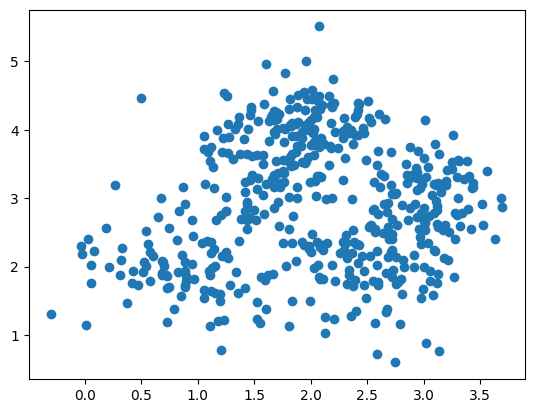

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
rnd = np.random.RandomState(25)

# Generate data for five clusters
x1, y1 = sorted(list(rnd.normal(1.0, 0.5, size=100))), list(rnd.normal(2.0, 0.4, size=100))
x2, y2 = sorted(list(rnd.normal(2.0, 0.3, size=100))), list(rnd.normal(4.0, 0.4, size=100))
x3, y3 = sorted(list(rnd.normal(2.5, 0.4, size=100))), list(rnd.normal(2.0, 0.5, size=100))
x4, y4 = sorted(list(rnd.normal(3.0, 0.3, size=100))), list(rnd.normal(3.0, 0.4, size=100))
x5, y5 = sorted(list(rnd.normal(1.5, 0.4, size=100))), list(rnd.normal(3.5, 0.5, size=100))

# Combine data for plotting
x_combined = x1 + x2 + x3 + x4 + x5
y_combined = y1 + y2 + y3 + y4 + y5

# Visualize data
fig, ax = plt.subplots()
ax.scatter(x_combined, y_combined)
plt.show()

## **<font color='#306998'>TASK </font><font color='#ffd33b'>2</font>**

Manually create several clusters by combining and splitting data from various distributions (the data from Task 1) in different ways.

*Hint:*
```python
models = []

# one large cluster containing all observations
model1 = [(x1+x2+x3+x4, y1+y2+y3+y4)]

# 2 clusters:
model2_4 = [(x1+x2+x3, y1+y2+y3), (x4, y4)]
model2_3 = [(x1+x2+x4, y1+y2+y4), (x3, y3)]
model2_2 = [(x1+x3+x4, y1+y3+y4), (x2, y2)]
model2_1 = [(x2+x3+x4, y2+y3+y4), (x1, y1)]

# 3 clusters:
# ...

models = [
    model1,
    model2_1, model2_2, model2_3, model2_4,
    # ...
]
```

In [31]:
# Assuming x1, y1, ..., x5, y5 are defined as per the previous task

# One large cluster containing all observations
model1 = [(x1 + x2 + x3 + x4 + x5, y1 + y2 + y3 + y4 + y5)]

# 2 clusters
model2_1 = [(x1 + x2 + x3 + x4, y1 + y2 + y3 + y4), (x5, y5)]
model2_2 = [(x1 + x2 + x3, y1 + y2 + y3), (x4 + x5, y4 + y5)]
model2_3 = [(x1 + x4 + x5, y1 + y4 + y5), (x2 + x3, y2 + y3)]
model2_4 = [(x2 + x3 + x4 + x5, y2 + y3 + y4 + y5), (x1, y1)]

# 3 clusters
model3_1 = [(x1 + x2, y1 + y2), (x3, y3), (x4 + x5, y4 + y5)]
model3_2 = [(x1, y1), (x2 + x3 + x4, y2 + y3 + y4), (x5, y5)]
model3_3 = [(x1 + x5, y1 + y5), (x2, y2), (x3 + x4, y3 + y4)]

# 4 clusters
model4 = [(x1, y1), (x2, y2), (x3, y3), (x4 + x5, y4 + y5)]

# 5 clusters (original clusters)
model5 = [(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5)]

# Combine all models into a list
models = [
    model1,
    model2_1, model2_2, model2_3, model2_4,
    model3_1, model3_2, model3_3,
    model4,
    model5
]

## **<font color='#306998'>TASK </font><font color='#ffd33b'>3</font>**

Compare the elbow method (SSE) with the aggregated Silhouette graphs. Which of the above methods gives better information about the optimal number of clusters?

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [2, 3, 4, 5, 6]
}
points_df = pd.DataFrame(data)

scaler = StandardScaler()
points_df_scaled = scaler.fit_transform(points_df)

points_df_scaled = pd.DataFrame(points_df_scaled, columns=points_df.columns)

## **<font color='#306998'>TASK </font><font color='#ffd33b'>4</font>**

Implement you own version of `davies_bouldin_index()` function (if not done previously) and comapare results with `davies_bouldin_score()` from sklearn.

In [32]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

def davies_bouldin_index(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    S = [np.mean(pairwise_distances(k, [centroid])) for k, centroid in zip(cluster_k, centroids)]
    Ri = []

    for i in range(n_cluster):
        Rij = []
        for j in range(n_cluster):
            if j != i:
                rij = (S[i] + S[j]) / np.linalg.norm(centroids[i] - centroids[j])
                Rij.append(rij)
        Ri.append(max(Rij))

    db_index = np.mean(Ri)
    return db_index

# Example usage with dummy data
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=150, centers=3, n_features=2, random_state=42)

# Calculate DBI using the custom function
dbi_custom = davies_bouldin_index(X, labels)

# Calculate DBI using sklearn's function
dbi_sklearn = davies_bouldin_score(X, labels)

print(f"Custom DBI: {dbi_custom}")
print(f"Sklearn DBI: {dbi_sklearn}")

Custom DBI: 0.21574486226404252
Sklearn DBI: 0.21574486226404255


# **<font color='#ffd33b'>SOLUTIONS</font>**

In [ ]:
# solution to Silhouette Coefficient
cluster1_ = np.stack(cluster1, axis=1)
cluster2_ = np.stack(cluster2, axis=1)
cluster3_ = np.stack(cluster3, axis=1)

clusters_ = np.concatenate([cluster1_, cluster2_, cluster3_], axis=0)
labels = [i//10 + 1 for i in range(30)]